
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

First 5 rows:

   instant      dteday  season  yr  mnth  holiday  weekday  w

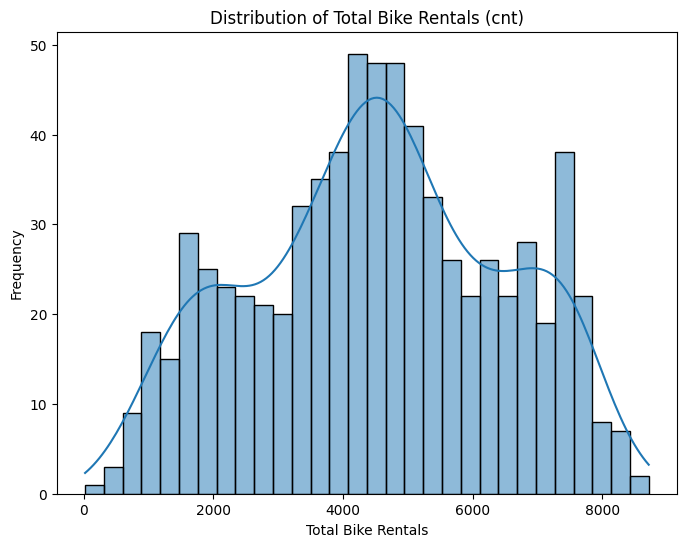

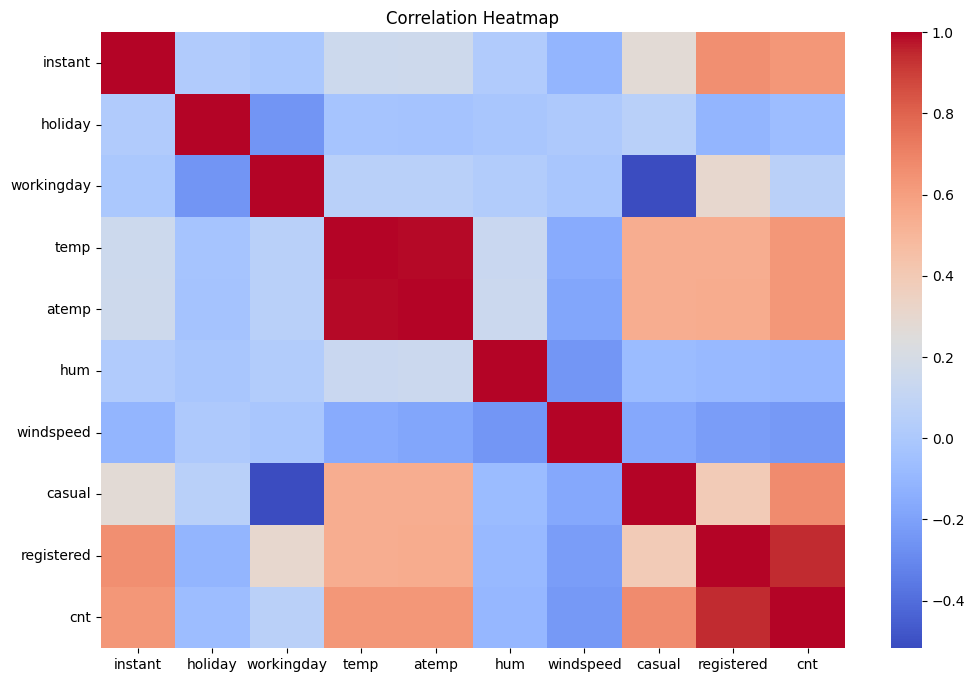


Feature Coefficients:

                       Feature  Coefficient
11                     yr_2019  1953.194148
8                season_winter   636.432851
19                      mnth_9   604.038467
13                      mnth_3   446.131760
28                   weekday_6   390.758900
1                   workingday   319.781429
20                     mnth_10   299.389006
15                      mnth_5   238.419418
12                      mnth_2   124.189508
27                   weekday_5   109.678682
7                season_summer    94.022726
3                        atemp    57.283834
26                   weekday_4    52.850466
2                         temp    49.842978
25                   weekday_3    29.086856
16                      mnth_6   -12.785192
4                          hum   -14.155596
5                    windspeed   -35.188674
14                      mnth_4   -35.859225
23                   weekday_1   -53.081155
18                      mnth_8  -103.240979
24      

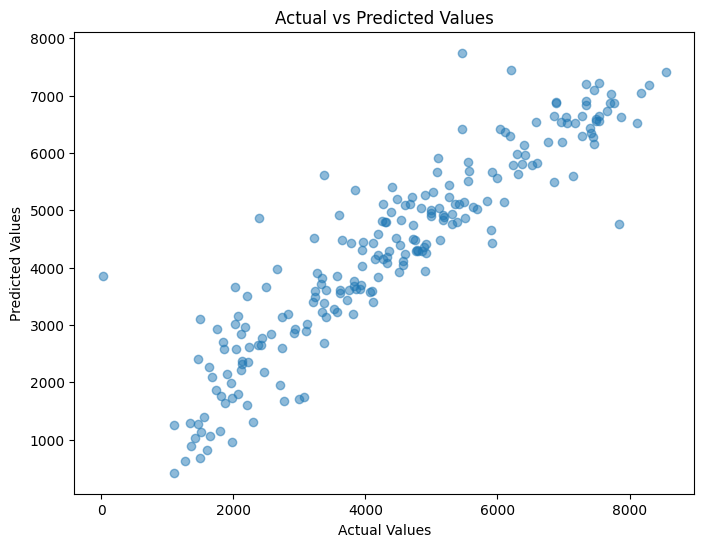

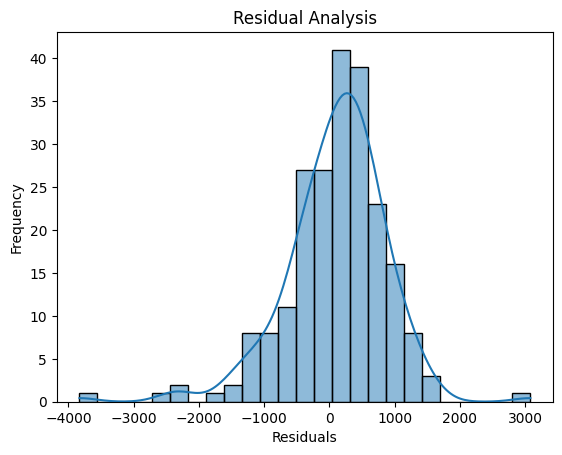


Results saved to C:\Users\3913\Downloads\model_results.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
data_path = 'C:\\Users\\3913\\Downloads\\day.csv'
data = pd.read_csv(data_path)

# Inspect the dataset
print("\nDataset Info:\n")
data.info()
print("\nFirst 5 rows:\n")
print(data.head())

# Data Preprocessing
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Encode categorical variables
data = pd.get_dummies(data, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)

# Feature Selection
X = data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = data['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nR-squared on test set: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# 1. Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Feature Importance (Coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:\n")
print(coefficients)

# 4. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 5. Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Analysis")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Save results to CSV
output_path = 'C:\\Users\\3913\\Downloads\\model_results.csv'
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_csv(output_path, index=False)
print(f"\nResults saved to {output_path}")
